# PROJECT: PREDICT COFFEE TREE PRODUCTIVITY

A country recently finished data collection project that aims to measure the various household and farmer characteristics of coffee farmers that attended any coffee training agronomy program. Therefore, in this project, I am looking for better understanding and predicting coffee tree productivity and its relationship with good agronomic practices that are taught in the coffee training program

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as smL
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns
from datetime import datetime
from matplotlib.pyplot import figure
import statsmodels.api as sm
import warnings 
warnings.filterwarnings ("ignore")


## Reading/ Loading the dataset into Jupiter notebook

In [2]:
df1 = pd.read_csv("coffee_farmer_dataset_1.csv")
df1

,hhid,today,coffee_farm_manager,survey_agreed,woredaname,kebele_def,farm_owner,hh_size,age_f,age_m,...,income_from_coffee_mod,coffeetrees,ao_ls_7,gap_rk,gap_ipdm,gap_weed,gap_nutrition,gap_ec,gap_shade,gap_rej
0,5410230,10-Jul-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,9,38.0,41.0,...,50%,1165.0,3,0,0,1,0,1,1,0
1,5410520,08-Jul-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,6,26.0,30.0,...,50%,97.0,2,0,0,1,0,1,1,0
2,5410229,17-Apr-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,11,39.0,43.0,...,100%,394.0,5,0,0,1,1,0,1,0
3,5410831,06-May-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,10,35.0,45.0,...,50%,271.0,6,0,0,1,0,0,1,1
4,5410232,10-Jul-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,9,38.0,40.0,...,50%,133.0,3,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,5530104,10-Mar-20,Both husband and wife equally,Yes,Bulehora,Sakicha,Both husband and wife equally,9,33.0,41.0,...,100%,344.0,2,0,1,1,1,1,1,0
3723,5520809,28-Feb-20,Woman (wife),Yes,Bulehora,Sakicha,Man (husband),2,25.0,28.0,...,100%,61.0,2,0,1,1,0,1,1,0
3724,5530508,23-Jun-20,Both husband and wife equally,Yes,Bulehora,Sakicha,Both husband and wife equally,11,35.0,41.0,...,100%,1283.0,4,0,1,1,1,1,1,1
3725,5530919,20-Mar-20,Both husband and wife equally,Yes,Bulehora,Sakicha,Both husband and wife equally,3,42.0,70.0,...,50%,31.0,8,0,0,1,0,1,1,0


## Check information of the dataset

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727 entries, 0 to 3726
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hhid                       3727 non-null   int64  
 1   today                      3727 non-null   object 
 2   coffee_farm_manager        3727 non-null   object 
 3   survey_agreed              3727 non-null   object 
 4   woredaname                 3727 non-null   object 
 5   kebele_def                 3727 non-null   object 
 6   farm_owner                 3727 non-null   object 
 7   hh_size                    3727 non-null   int64  
 8   age_f                      3637 non-null   float64
 9   age_m                      3598 non-null   float64
 10  coop_f                     3637 non-null   object 
 11  coop_m                     3598 non-null   object 
 12  edu_wh                     3637 non-null   object 
 13  edu_hw                     3598 non-null   objec

### Since there are NaN values in dataset, fill NaN values for numerical data using Linear interpolation

In [4]:
df1_new = df1.interpolate(method ='linear', limit_direction ='forward')

## Check information on new data set to see if all NaN values for numerical data are filled

In [5]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727 entries, 0 to 3726
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hhid                       3727 non-null   int64  
 1   today                      3727 non-null   object 
 2   coffee_farm_manager        3727 non-null   object 
 3   survey_agreed              3727 non-null   object 
 4   woredaname                 3727 non-null   object 
 5   kebele_def                 3727 non-null   object 
 6   farm_owner                 3727 non-null   object 
 7   hh_size                    3727 non-null   int64  
 8   age_f                      3727 non-null   float64
 9   age_m                      3727 non-null   float64
 10  coop_f                     3637 non-null   object 
 11  coop_m                     3598 non-null   object 
 12  edu_wh                     3637 non-null   object 
 13  edu_hw                     3598 non-null   objec

Now, all the NaN values for numerical values were handled

### Adding  coffee tree productivity column to the data set df1_new

### As defined, coffee tree productivity is equal to  total yield per household per year(in kg), divided by the number of arabica coffee trees

In [6]:
df1_new['coffee_tree_productivity'] = df1_new['washed_arabica_production'] / df1_new['coffeetrees']
# printing the first 5 rows
df1_new.head()

,hhid,today,coffee_farm_manager,survey_agreed,woredaname,kebele_def,farm_owner,hh_size,age_f,age_m,...,coffeetrees,ao_ls_7,gap_rk,gap_ipdm,gap_weed,gap_nutrition,gap_ec,gap_shade,gap_rej,coffee_tree_productivity
0,5410230,10-Jul-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,9,38.0,41.0,...,1165.0,3,0,0,1,0,1,1,0,2.626609
1,5410520,08-Jul-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,6,26.0,30.0,...,97.0,2,0,0,1,0,1,1,0,3.092784
2,5410229,17-Apr-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,11,39.0,43.0,...,394.0,5,0,0,1,1,0,1,0,3.045685
3,5410831,06-May-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,10,35.0,45.0,...,271.0,6,0,0,1,0,0,1,1,3.690037
4,5410232,10-Jul-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,9,38.0,40.0,...,133.0,3,0,0,0,0,1,1,0,3.383459


### Since in data frame 0/0 gives NaN value, replace the NaN values in coffee tree productivity by 0

In [7]:
df1_new['coffee_tree_productivity'] = df1_new['coffee_tree_productivity'].fillna(0)
df1_new.head(74)

,hhid,today,coffee_farm_manager,survey_agreed,woredaname,kebele_def,farm_owner,hh_size,age_f,age_m,...,coffeetrees,ao_ls_7,gap_rk,gap_ipdm,gap_weed,gap_nutrition,gap_ec,gap_shade,gap_rej,coffee_tree_productivity
0,5410230,10-Jul-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,9,38.0,41.0,...,1165.0,3,0,0,1,0,1,1,0,2.626609
1,5410520,08-Jul-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,6,26.0,30.0,...,97.0,2,0,0,1,0,1,1,0,3.092784
2,5410229,17-Apr-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,11,39.0,43.0,...,394.0,5,0,0,1,1,0,1,0,3.045685
3,5410831,06-May-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,10,35.0,45.0,...,271.0,6,0,0,1,0,0,1,1,3.690037
4,5410232,10-Jul-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,9,38.0,40.0,...,133.0,3,0,0,0,0,1,1,0,3.383459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,5410434,25-Apr-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,4,24.0,25.0,...,74.0,1,0,0,1,1,0,1,0,2.905405
70,5410923,17-Mar-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,11,42.0,50.0,...,479.0,3,0,0,1,1,0,1,1,4.175365
71,5410226,04-Apr-20,Man (husband),Yes,Kercha,Baniko Michicho,Both husband and wife equally,5,32.0,28.0,...,0.0,0,1,1,1,1,0,1,1,0.000000
72,5410440,19-May-20,Woman (wife),Yes,Kercha,Baniko Michicho,Jointly with other family members,1,61.0,26.5,...,123.0,1,0,0,1,0,0,1,0,2.276423


In [8]:
df1_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727 entries, 0 to 3726
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hhid                       3727 non-null   int64  
 1   today                      3727 non-null   object 
 2   coffee_farm_manager        3727 non-null   object 
 3   survey_agreed              3727 non-null   object 
 4   woredaname                 3727 non-null   object 
 5   kebele_def                 3727 non-null   object 
 6   farm_owner                 3727 non-null   object 
 7   hh_size                    3727 non-null   int64  
 8   age_f                      3727 non-null   float64
 9   age_m                      3727 non-null   float64
 10  coop_f                     3637 non-null   object 
 11  coop_m                     3598 non-null   object 
 12  edu_wh                     3637 non-null   object 
 13  edu_hw                     3598 non-null   objec

### Create a variable for coffee tree productivity and for the number of good agronomic practices adopted on a farm. Discuss the relationship between coffee tree productivity and the number of good agronomic practices adopted.

There are seven good agronomic practices given: record keeping, integrated pest
and disease management, weeding, nutrition, erosion control, shade, and
rejuvenation. These were given and can be found using the metadata sheet

### Extracting the coffee tree productivity and the 7 good agronomic practices columns from the data set and form a new dataset named df_good_agro_coffee_tree

In [9]:
df_good_agro_coffee_tree = df1_new.iloc[:,29:37]
df_good_agro_coffee_tree

,gap_rk,gap_ipdm,gap_weed,gap_nutrition,gap_ec,gap_shade,gap_rej,coffee_tree_productivity
0,0,0,1,0,1,1,0,2.626609
1,0,0,1,0,1,1,0,3.092784
2,0,0,1,1,0,1,0,3.045685
3,0,0,1,0,0,1,1,3.690037
4,0,0,0,0,1,1,0,3.383459
...,...,...,...,...,...,...,...,...
3722,0,1,1,1,1,1,0,2.906977
3723,0,1,1,0,1,1,0,3.278689
3724,0,1,1,1,1,1,1,3.897116
3725,0,0,1,0,1,1,0,3.225806


### Check information for the df_good_agro_coffee_tree data frame

In [10]:
df_good_agro_coffee_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727 entries, 0 to 3726
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gap_rk                    3727 non-null   int64  
 1   gap_ipdm                  3727 non-null   int64  
 2   gap_weed                  3727 non-null   int64  
 3   gap_nutrition             3727 non-null   int64  
 4   gap_ec                    3727 non-null   int64  
 5   gap_shade                 3727 non-null   int64  
 6   gap_rej                   3727 non-null   int64  
 7   coffee_tree_productivity  3727 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 233.1 KB


The data set is clean and ready for analysis. There are no NaN values

### using correlation coefficient to find the relationship between coffee treeproductivity and the number of good agronomic practices adopted

# Correlation Matrix of all variables

In [11]:
Corr_Matrix = df_good_agro_coffee_tree.corr()
Corr_Matrix

,gap_rk,gap_ipdm,gap_weed,gap_nutrition,gap_ec,gap_shade,gap_rej,coffee_tree_productivity
gap_rk,1.000000,0.045056,0.023375,0.102775,0.016287,0.041653,0.101155,0.175891
gap_ipdm,0.045056,1.000000,0.051123,0.318146,-0.059595,-0.172310,0.135507,0.300751
gap_weed,0.023375,0.051123,1.000000,0.014471,0.167330,0.050568,0.011144,0.320318
gap_nutrition,0.102775,0.318146,0.014471,1.000000,-0.086769,0.030839,0.147320,0.361719
gap_ec,0.016287,-0.059595,0.167330,-0.086769,1.000000,0.018637,-0.072726,0.259880
gap_shade,0.041653,-0.172310,0.050568,0.030839,0.018637,1.000000,0.008202,0.204481
gap_rej,0.101155,0.135507,0.011144,0.147320,-0.072726,0.008202,1.000000,0.240958
coffee_tree_productivity,0.175891,0.300751,0.320318,0.361719,0.259880,0.204481,0.240958,1.000000


### Correlation coefficient between each variable( good agronomic practices) and coffee tree productivity

In [12]:
Corr_coffee_variables = df_good_agro_coffee_tree.corr()['coffee_tree_productivity'][:]
Corr_coffee_variables

gap_rk                      0.175891
gap_ipdm                    0.300751
gap_weed                    0.320318
gap_nutrition               0.361719
gap_ec                      0.259880
gap_shade                   0.204481
gap_rej                     0.240958
coffee_tree_productivity    1.000000
Name: coffee_tree_productivity, dtype: float64

from the correlation matrix obtained above, we see that the good agronomic practices
are weakly i.e not strongly correlated with the coffee tree productivity. In addion, the correlation coefficient between good agronomic practices and coffee tree productivity are all positive. It means that the increase of one variable led to the small increase in the coffee tree productivity and vice versa. 

### Using heat-map to visualize well the correlation matrix

<AxesSubplot:>

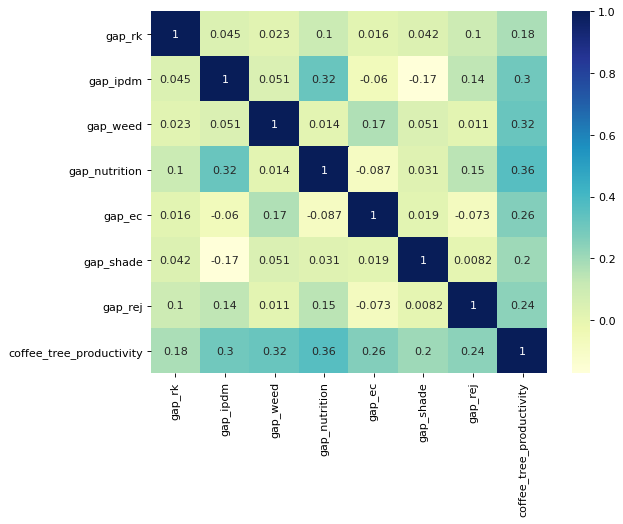

In [13]:
figure(figsize=(8, 6), dpi=80)
sns.heatmap(Corr_Matrix, cmap="YlGnBu",annot=True)

From the graph above, the dark-blue color indicates the strongest dependencies of the 
agronomic practices to the coffee tree productivity. As the color changes from dark-blue to 
light-blue color, the dependencies between those variables decreases.

Therefore, the graph shows that there is reasonable dependency between 2 agronomic practices 
(gap-nutrition and gap-weed) to the coffee tree productivity and there is minor dependency 
between the rest agronomic practices with the coffee tree productivity.

### Performing feature selection to see if there are some good agronomic practices significantly more relevant than others in explaining coffee tree productivity using forward stepwise feature selection

### Ref: Ref: https://github.com/AakkashVijayakumar/stepwise-regression/blob/master/stepwise_regression/step_reg.py

## First, extract the dependent (X) and independent/target (y) variables

In [14]:
X = df_good_agro_coffee_tree.iloc[:,:7]
y = df_good_agro_coffee_tree["coffee_tree_productivity"]

## Performing forward stepwise

In [15]:
def forward_stepwise(X, y,
                       threshold_in,
                       verbose=False):
    a_list = []
    included = list(a_list)
    while True:
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        print('The remaining independent variables in our dataset are:')
        print(excluded)
        print(' ')
        changed=False
        
        for new_column in excluded:
            ## use stepwise to fit the model 
            my_model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            
            ## extracting pvalues from the model
            new_pval[new_column] = my_model.pvalues[new_column]
            
        ## best-pval are the minimum p-values from the list of p-values obtained above in new-pval
        best_pval = new_pval.min()
        
        
        ## condition to compare the best-pval we get with the threshold-in pvalue we put (as the input) in the function created
        ## if this pvalue is less than the threshold-in, then we should accept this pvalue and append it in the included list created
        ## and the best performed variables are the variables with the lowes p-values
        
        if best_pval < threshold_in:
            performed_variables = new_pval.idxmin()
            included.append(performed_variables)
            changed=True
            
            ## this will give us the most features using stepwise regression method i.e it will Add best features as performed variables and print it out            
            if verbose:
                print('now add this variable to the best performing features')
                print('Add  {:30} with p-value {:.6}'.format(performed_variables, best_pval))
                print(' ')
                print('The best performing features are:')
                print(included)
                print(' ')
        if not changed:
            break
    ## this will return the included list of features with p-values that are less than threshold-in and summary statistics of the model
    return included
## calling our function and pass in the parameters as defined i.e X,y are our variables, 0.05 is the threshold_in for pvalues
best_features = forward_stepwise(X, y, 0.05, verbose = True)

best_features

The remaining independent variables in our dataset are:
['gap_ipdm', 'gap_shade', 'gap_rk', 'gap_nutrition', 'gap_ec', 'gap_weed', 'gap_rej']
 
now add this variable to the best performing features
Add  gap_nutrition                  with p-value 1.34951e-115
 
The best performing features are:
['gap_nutrition']
 
The remaining independent variables in our dataset are:
['gap_rk', 'gap_ipdm', 'gap_shade', 'gap_ec', 'gap_weed', 'gap_rej']
 
now add this variable to the best performing features
Add  gap_weed                       with p-value 3.04295e-100
 
The best performing features are:
['gap_nutrition', 'gap_weed']
 
The remaining independent variables in our dataset are:
['gap_rk', 'gap_ipdm', 'gap_shade', 'gap_ec', 'gap_rej']
 
now add this variable to the best performing features
Add  gap_ec                         with p-value 2.59661e-66
 
The best performing features are:
['gap_nutrition', 'gap_weed', 'gap_ec']
 
The remaining independent variables in our dataset are:
['gap_ipd

['gap_nutrition',
 'gap_weed',
 'gap_ec',
 'gap_rej',
 'gap_shade',
 'gap_ipdm',
 'gap_rk']

The results shows that all the seven practices given are relevant. There are no superior good 
agronomic practices that are more relevant than others.

### Building prediction models for coffee tree productivity. One based on the number of good agronomic practices adopted and the other based on all the good agronomic practices. 

### Since all 7 practices were chosen i.e no superior good agronomic practive is more relevant than others, therefore, the model will be the same

## defining the testing data set X_test and y_test i.e out_sample to be used for predictions 

## Reading/Loading coffee_farmer_dataset_2 which is testing data sets in Jupiter

In [16]:
df2 = pd.read_csv("coffee_farmer_dataset_2.csv")
df2

,hhid,today,coffee_farm_manager,survey_agreed,woredaname,kebele_def,farm_owner,hh_size,age_f,age_m,...,coffeetrees,ao_ls_7,gap_rk,gap_ipdm,gap_weed,gap_nutrition,gap_ec,gap_shade,gap_rej,_merge
0,5750408,26-Jun-20,Both husband and wife equally,Yes,Bulehora,Dibisa Ogo,Man (husband),9,45.0,50.0,...,294.0,8,0,0,1,1,1,1,1,matched (3)
1,5750210,11-May-20,Man (husband),Yes,Bulehora,Dibisa Ogo,Both husband and wife equally,5,24.0,25.0,...,142.0,1,0,0,1,0,0,0,0,matched (3)
2,5730931,07-Jul-20,Both husband and wife equally,Yes,Bulehora,Dibisa Ogo,Both husband and wife equally,9,35.0,45.0,...,NaN,2,0,0,1,0,0,0,0,matched (3)
3,5740716,16-Apr-20,Both husband and wife equally,Yes,Bulehora,Dibisa Ogo,Both husband and wife equally,5,27.0,30.0,...,24.0,0,0,1,1,1,0,0,1,matched (3)
4,5761003,01-Apr-20,Both husband and wife equally,Yes,Bulehora,Dibisa Ogo,Both husband and wife equally,8,40.0,50.0,...,163.0,6,0,0,1,1,0,1,0,matched (3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,5780706,18-May-20,Both husband and wife equally,Yes,Bulehora,Mirigo Korobo,Both husband and wife equally,9,40.0,45.0,...,307.0,4,0,0,1,0,1,1,0,matched (3)
1245,5770703,05-Jul-20,Man (husband),Yes,Bulehora,Mirigo Korobo,Both husband and wife equally,6,28.0,32.0,...,261.0,2,0,0,1,0,0,0,0,matched (3)
1246,5770938,27-Apr-20,Both husband and wife equally,Yes,Bulehora,Mirigo Korobo,Both husband and wife equally,6,28.0,33.0,...,348.0,2,0,1,0,0,0,0,0,matched (3)
1247,5780713,02-Mar-20,Man (husband),Yes,Bulehora,Mirigo Korobo,Both husband and wife equally,8,38.0,42.0,...,167.0,2,0,1,1,0,0,1,0,matched (3)


## Check information of the test data

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hhid                       1249 non-null   int64  
 1   today                      1249 non-null   object 
 2   coffee_farm_manager        1249 non-null   object 
 3   survey_agreed              1249 non-null   object 
 4   woredaname                 1249 non-null   object 
 5   kebele_def                 1249 non-null   object 
 6   farm_owner                 1249 non-null   object 
 7   hh_size                    1249 non-null   int64  
 8   age_f                      1214 non-null   float64
 9   age_m                      1223 non-null   float64
 10  coop_f                     1214 non-null   object 
 11  coop_m                     1223 non-null   object 
 12  edu_wh                     1214 non-null   object 
 13  edu_hw                     1223 non-null   objec

## Since there are NaN values in dataset, fill NaN values for numerical data using Linear interpolation as done for the first data set

In [18]:
df2_new = df2.interpolate(method ='linear', limit_direction ='forward')
df2_new

,hhid,today,coffee_farm_manager,survey_agreed,woredaname,kebele_def,farm_owner,hh_size,age_f,age_m,...,coffeetrees,ao_ls_7,gap_rk,gap_ipdm,gap_weed,gap_nutrition,gap_ec,gap_shade,gap_rej,_merge
0,5750408,26-Jun-20,Both husband and wife equally,Yes,Bulehora,Dibisa Ogo,Man (husband),9,45.0,50.0,...,294.0,8,0,0,1,1,1,1,1,matched (3)
1,5750210,11-May-20,Man (husband),Yes,Bulehora,Dibisa Ogo,Both husband and wife equally,5,24.0,25.0,...,142.0,1,0,0,1,0,0,0,0,matched (3)
2,5730931,07-Jul-20,Both husband and wife equally,Yes,Bulehora,Dibisa Ogo,Both husband and wife equally,9,35.0,45.0,...,83.0,2,0,0,1,0,0,0,0,matched (3)
3,5740716,16-Apr-20,Both husband and wife equally,Yes,Bulehora,Dibisa Ogo,Both husband and wife equally,5,27.0,30.0,...,24.0,0,0,1,1,1,0,0,1,matched (3)
4,5761003,01-Apr-20,Both husband and wife equally,Yes,Bulehora,Dibisa Ogo,Both husband and wife equally,8,40.0,50.0,...,163.0,6,0,0,1,1,0,1,0,matched (3)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,5780706,18-May-20,Both husband and wife equally,Yes,Bulehora,Mirigo Korobo,Both husband and wife equally,9,40.0,45.0,...,307.0,4,0,0,1,0,1,1,0,matched (3)
1245,5770703,05-Jul-20,Man (husband),Yes,Bulehora,Mirigo Korobo,Both husband and wife equally,6,28.0,32.0,...,261.0,2,0,0,1,0,0,0,0,matched (3)
1246,5770938,27-Apr-20,Both husband and wife equally,Yes,Bulehora,Mirigo Korobo,Both husband and wife equally,6,28.0,33.0,...,348.0,2,0,1,0,0,0,0,0,matched (3)
1247,5780713,02-Mar-20,Man (husband),Yes,Bulehora,Mirigo Korobo,Both husband and wife equally,8,38.0,42.0,...,167.0,2,0,1,1,0,0,1,0,matched (3)


In [19]:
df2_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hhid                       1249 non-null   int64  
 1   today                      1249 non-null   object 
 2   coffee_farm_manager        1249 non-null   object 
 3   survey_agreed              1249 non-null   object 
 4   woredaname                 1249 non-null   object 
 5   kebele_def                 1249 non-null   object 
 6   farm_owner                 1249 non-null   object 
 7   hh_size                    1249 non-null   int64  
 8   age_f                      1249 non-null   float64
 9   age_m                      1249 non-null   float64
 10  coop_f                     1214 non-null   object 
 11  coop_m                     1223 non-null   object 
 12  edu_wh                     1214 non-null   object 
 13  edu_hw                     1223 non-null   objec

### Adding  coffee tree productivity column to the test data set df2_new

### As defined, coffee tree productivity is equal to  total yield per household per year(in kg), divided by the number of arabica coffee trees

In [20]:
df2_new['coffee_tree_productivity'] = df2_new['washed_arabica_production'] / df2_new['coffeetrees']
df2_new.head()

,hhid,today,coffee_farm_manager,survey_agreed,woredaname,kebele_def,farm_owner,hh_size,age_f,age_m,...,ao_ls_7,gap_rk,gap_ipdm,gap_weed,gap_nutrition,gap_ec,gap_shade,gap_rej,_merge,coffee_tree_productivity
0,5750408,26-Jun-20,Both husband and wife equally,Yes,Bulehora,Dibisa Ogo,Man (husband),9,45.0,50.0,...,8,0,0,1,1,1,1,1,matched (3),3.401361
1,5750210,11-May-20,Man (husband),Yes,Bulehora,Dibisa Ogo,Both husband and wife equally,5,24.0,25.0,...,1,0,0,1,0,0,0,0,matched (3),1.056338
2,5730931,07-Jul-20,Both husband and wife equally,Yes,Bulehora,Dibisa Ogo,Both husband and wife equally,9,35.0,45.0,...,2,0,0,1,0,0,0,0,matched (3),1.506024
3,5740716,16-Apr-20,Both husband and wife equally,Yes,Bulehora,Dibisa Ogo,Both husband and wife equally,5,27.0,30.0,...,0,0,1,1,1,0,0,1,matched (3),4.166667
4,5761003,01-Apr-20,Both husband and wife equally,Yes,Bulehora,Dibisa Ogo,Both husband and wife equally,8,40.0,50.0,...,6,0,0,1,1,0,1,0,matched (3),3.067485


## dropping the _merge column

In [21]:
df2_new_ = df2_new.drop('_merge', axis=1)
df2_new_.head()

,hhid,today,coffee_farm_manager,survey_agreed,woredaname,kebele_def,farm_owner,hh_size,age_f,age_m,...,coffeetrees,ao_ls_7,gap_rk,gap_ipdm,gap_weed,gap_nutrition,gap_ec,gap_shade,gap_rej,coffee_tree_productivity
0,5750408,26-Jun-20,Both husband and wife equally,Yes,Bulehora,Dibisa Ogo,Man (husband),9,45.0,50.0,...,294.0,8,0,0,1,1,1,1,1,3.401361
1,5750210,11-May-20,Man (husband),Yes,Bulehora,Dibisa Ogo,Both husband and wife equally,5,24.0,25.0,...,142.0,1,0,0,1,0,0,0,0,1.056338
2,5730931,07-Jul-20,Both husband and wife equally,Yes,Bulehora,Dibisa Ogo,Both husband and wife equally,9,35.0,45.0,...,83.0,2,0,0,1,0,0,0,0,1.506024
3,5740716,16-Apr-20,Both husband and wife equally,Yes,Bulehora,Dibisa Ogo,Both husband and wife equally,5,27.0,30.0,...,24.0,0,0,1,1,1,0,0,1,4.166667
4,5761003,01-Apr-20,Both husband and wife equally,Yes,Bulehora,Dibisa Ogo,Both husband and wife equally,8,40.0,50.0,...,163.0,6,0,0,1,1,0,1,0,3.067485


### Since in data frame 0/0 gives NaN value, replace the NaN values in coffee tree productivity by 0

In [22]:
df2_new_['coffee_tree_productivity'] = df2_new_['coffee_tree_productivity'].fillna(0)
df2_new_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   hhid                       1249 non-null   int64  
 1   today                      1249 non-null   object 
 2   coffee_farm_manager        1249 non-null   object 
 3   survey_agreed              1249 non-null   object 
 4   woredaname                 1249 non-null   object 
 5   kebele_def                 1249 non-null   object 
 6   farm_owner                 1249 non-null   object 
 7   hh_size                    1249 non-null   int64  
 8   age_f                      1249 non-null   float64
 9   age_m                      1249 non-null   float64
 10  coop_f                     1214 non-null   object 
 11  coop_m                     1223 non-null   object 
 12  edu_wh                     1214 non-null   object 
 13  edu_hw                     1223 non-null   objec

## Extracting the coffee tree productivity and the 7 good agronomic practices columns from the test data set and form a new test dataset

In [23]:
df_good_agro_coffee_tree_test = df2_new_.iloc[:,29:37]
df_good_agro_coffee_tree_test

,gap_rk,gap_ipdm,gap_weed,gap_nutrition,gap_ec,gap_shade,gap_rej,coffee_tree_productivity
0,0,0,1,1,1,1,1,3.401361
1,0,0,1,0,0,0,0,1.056338
2,0,0,1,0,0,0,0,1.506024
3,0,1,1,1,0,0,1,4.166667
4,0,0,1,1,0,1,0,3.067485
...,...,...,...,...,...,...,...,...
1244,0,0,1,0,1,1,0,2.768730
1245,0,0,1,0,0,0,0,1.149425
1246,0,1,0,0,0,0,0,0.862069
1247,0,1,1,0,0,1,0,2.275449


Clean data set which is ready for analysis

## Check information to see if there is no missing value

In [24]:
df_good_agro_coffee_tree_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1249 entries, 0 to 1248
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   gap_rk                    1249 non-null   int64  
 1   gap_ipdm                  1249 non-null   int64  
 2   gap_weed                  1249 non-null   int64  
 3   gap_nutrition             1249 non-null   int64  
 4   gap_ec                    1249 non-null   int64  
 5   gap_shade                 1249 non-null   int64  
 6   gap_rej                   1249 non-null   int64  
 7   coffee_tree_productivity  1249 non-null   float64
dtypes: float64(1), int64(7)
memory usage: 78.2 KB


## extracting the dependent and independent variables from the test data set

In [25]:
X_test = np.array(df_good_agro_coffee_tree_test.iloc[:,:7])
y_test = np.array(df_good_agro_coffee_tree_test["coffee_tree_productivity"]).reshape(-1,1)

## Building prediction model

# Linear Regression model

## Linear Regression is used because the target variable has numerical/ continuous data 

In [26]:
LinearModel = LinearRegression().fit(X,y)
y_pred = LinearModel.predict(X_test)


R_square = LinearModel.score(X,y)
mse = mse(y_test, y_pred)

print(f'R_square is {R_square}')
print(f'mean square error is {mse}')

R_square is 0.4150988132227612
mean square error is 0.4263553414884619


##  Finding other relevant predictors for coffee tree productivity

## Performing stepwise feature selection for the whole dataset

## Recalling dependent and independent featues of the original dataset

In [27]:
Xf = df1_new
yf = df_good_agro_coffee_tree[["coffee_tree_productivity"]]


## dropping columns which are not important

In [28]:
Xf_final = Xf.drop({'hhid','coffee_farm_manager','farm_owner'}, axis=1)
Xf_final.columns

Index(['today', 'survey_agreed', 'woredaname', 'kebele_def', 'hh_size',
       'age_f', 'age_m', 'coop_f', 'coop_m', 'edu_wh', 'edu_hw', 'gpslatitude',
       'gpslongitude', 'farm_area_total', 'coffeefarm_area_total',
       'num_coffee_fields', 'ao_7', 'ao_10', 'ao_13', 'ao_14', 'ao_17',
       'washed_arabica_production', 'trainings3', 'income_from_coffee_mod',
       'coffeetrees', 'ao_ls_7', 'gap_rk', 'gap_ipdm', 'gap_weed',
       'gap_nutrition', 'gap_ec', 'gap_shade', 'gap_rej',
       'coffee_tree_productivity'],
      dtype='object')

## Now perform OneHot encoding using pandas for dataframeTo convert all categorical data into numerical data

In [29]:
df_encoded = pd.get_dummies(data = Xf_final[['survey_agreed','woredaname','kebele_def','coop_f','coop_m','edu_wh','edu_hw',
                                           'ao_10','ao_14','ao_17','ao_7','ao_13','income_from_coffee_mod']],
                         prefix=['s','w','k','c','C','ew','eh','A','a','Ao','ao','Aao','inc'],drop_first=True)
df_encoded

,w_Kercha,k_Berdaye,k_Egu Abeyi,k_Goromi,k_Kercha Enshe,k_Layo Kuni,k_Ropi Magada,k_Rusa Haniku,k_Sakicha,c_Yes,...,Aao_Rainwater tank or large water tank (directly used or connected to a pipe),Aao_River / Lake / Pond / Canal,Aao_Tube well / Borehole,Aao_Unprotected dug well or spring,inc_100%,inc_25%,inc_50%,inc_<25%,inc_>25% and <50%,inc_>50%
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3723,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3724,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
3725,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


## then extract the data frame of continuous or numerical values only from the original data frame

In [30]:
df_numerical = Xf_final[['today','hh_size','age_f','age_m','gpslatitude','gpslongitude','farm_area_total','coffeefarm_area_total',
                        'num_coffee_fields','washed_arabica_production','trainings3','coffeetrees','ao_ls_7','gap_rk', 
                         'gap_ipdm', 'gap_weed','gap_nutrition', 'gap_ec','gap_shade', 'gap_rej']]


df_numerical

,today,hh_size,age_f,age_m,gpslatitude,gpslongitude,farm_area_total,coffeefarm_area_total,num_coffee_fields,washed_arabica_production,trainings3,coffeetrees,ao_ls_7,gap_rk,gap_ipdm,gap_weed,gap_nutrition,gap_ec,gap_shade,gap_rej
0,10-Jul-20,9,38.0,41.0,5.818869,38.442699,3.00,3.00,2,3060.0,1,1165.0,3,0,0,1,0,1,1,0
1,08-Jul-20,6,26.0,30.0,5.806711,38.434364,0.75,0.50,1,300.0,1,97.0,2,0,0,1,0,1,1,0
2,17-Apr-20,11,39.0,43.0,5.809610,38.434338,4.00,3.50,4,1200.0,1,394.0,5,0,0,1,1,0,1,0
3,06-May-20,10,35.0,45.0,5.822146,38.412811,3.00,2.75,2,1000.0,1,271.0,6,0,0,1,0,0,1,1
4,10-Jul-20,9,38.0,40.0,5.821015,38.438015,4.50,4.00,2,450.0,1,133.0,3,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,10-Mar-20,9,33.0,41.0,5.751263,38.342899,2.00,2.00,2,1000.0,1,344.0,2,0,1,1,1,1,1,0
3723,28-Feb-20,2,25.0,28.0,5.731707,38.362423,1.25,1.00,2,200.0,1,61.0,2,0,1,1,0,1,1,0
3724,23-Jun-20,11,35.0,41.0,5.757202,38.353142,2.00,2.00,2,5000.0,1,1283.0,4,0,1,1,1,1,1,1
3725,20-Mar-20,3,42.0,70.0,5.762564,38.345932,2.00,1.00,1,100.0,1,31.0,8,0,0,1,0,1,1,0


## Converting today column into integer values
### https://stackoverflow.com/questions/28154066/how-to-convert-datetime-to-integer-in-python


In [31]:
def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day

# datetime_object.day

new_date=[]

for index, row in df_numerical.iterrows():
   # date=datetime.strptime(row['today'], '%d-%b-%Y')
    date = row['today'].split("-")
    year=date[2]+"20"
    date[2]=year
    date=date[0]+'-'+date[1]+'-'+date[2]
    date=datetime.strptime(date, '%d-%b-%Y')
    
    new_date.append(to_integer(date))


df_numerical["int_date"]=new_date
    
df_numerical_final = df_numerical.drop('today', axis=1)    
df_numerical_final

,hh_size,age_f,age_m,gpslatitude,gpslongitude,farm_area_total,coffeefarm_area_total,num_coffee_fields,washed_arabica_production,trainings3,coffeetrees,ao_ls_7,gap_rk,gap_ipdm,gap_weed,gap_nutrition,gap_ec,gap_shade,gap_rej,int_date
0,9,38.0,41.0,5.818869,38.442699,3.00,3.00,2,3060.0,1,1165.0,3,0,0,1,0,1,1,0,20200710
1,6,26.0,30.0,5.806711,38.434364,0.75,0.50,1,300.0,1,97.0,2,0,0,1,0,1,1,0,20200708
2,11,39.0,43.0,5.809610,38.434338,4.00,3.50,4,1200.0,1,394.0,5,0,0,1,1,0,1,0,20200417
3,10,35.0,45.0,5.822146,38.412811,3.00,2.75,2,1000.0,1,271.0,6,0,0,1,0,0,1,1,20200506
4,9,38.0,40.0,5.821015,38.438015,4.50,4.00,2,450.0,1,133.0,3,0,0,0,0,1,1,0,20200710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,9,33.0,41.0,5.751263,38.342899,2.00,2.00,2,1000.0,1,344.0,2,0,1,1,1,1,1,0,20200310
3723,2,25.0,28.0,5.731707,38.362423,1.25,1.00,2,200.0,1,61.0,2,0,1,1,0,1,1,0,20200228
3724,11,35.0,41.0,5.757202,38.353142,2.00,2.00,2,5000.0,1,1283.0,4,0,1,1,1,1,1,1,20200623
3725,3,42.0,70.0,5.762564,38.345932,2.00,1.00,1,100.0,1,31.0,8,0,0,1,0,1,1,0,20200320


## join the numerical data frame with the encoded data frame together

In [32]:
df_Final = df_numerical_final.join(df_encoded)
df_Final

,hh_size,age_f,age_m,gpslatitude,gpslongitude,farm_area_total,coffeefarm_area_total,num_coffee_fields,washed_arabica_production,trainings3,...,Aao_Rainwater tank or large water tank (directly used or connected to a pipe),Aao_River / Lake / Pond / Canal,Aao_Tube well / Borehole,Aao_Unprotected dug well or spring,inc_100%,inc_25%,inc_50%,inc_<25%,inc_>25% and <50%,inc_>50%
0,9,38.0,41.0,5.818869,38.442699,3.00,3.00,2,3060.0,1,...,0,0,0,0,0,0,1,0,0,0
1,6,26.0,30.0,5.806711,38.434364,0.75,0.50,1,300.0,1,...,0,0,0,0,0,0,1,0,0,0
2,11,39.0,43.0,5.809610,38.434338,4.00,3.50,4,1200.0,1,...,0,0,0,0,1,0,0,0,0,0
3,10,35.0,45.0,5.822146,38.412811,3.00,2.75,2,1000.0,1,...,0,0,0,0,0,0,1,0,0,0
4,9,38.0,40.0,5.821015,38.438015,4.50,4.00,2,450.0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3722,9,33.0,41.0,5.751263,38.342899,2.00,2.00,2,1000.0,1,...,0,0,0,0,1,0,0,0,0,0
3723,2,25.0,28.0,5.731707,38.362423,1.25,1.00,2,200.0,1,...,0,0,0,1,1,0,0,0,0,0
3724,11,35.0,41.0,5.757202,38.353142,2.00,2.00,2,5000.0,1,...,0,0,0,0,1,0,0,0,0,0
3725,3,42.0,70.0,5.762564,38.345932,2.00,1.00,1,100.0,1,...,0,1,0,0,0,0,1,0,0,0


## Defining predictors and target variable

In [33]:
Xf_ = df_Final
yf_ = df_good_agro_coffee_tree["coffee_tree_productivity"]

## Again, performing forward stepwise to select important features

In [34]:
def forward_regression(Xf_, yf_,
                       threshold_in,
                       verbose=False):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(Xf_.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(yf_, sm.add_constant(pd.DataFrame(Xf_[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

forward_regression(Xf_, yf_,0.05,verbose=False)
                       
                       

['gap_nutrition',
 'gap_weed',
 'gap_ec',
 'gap_rej',
 'gap_shade',
 'gap_ipdm',
 'coffeetrees',
 'washed_arabica_production',
 'gap_rk',
 'ew_Diploma - Grade 10+4',
 'gpslatitude',
 'Aao_Tube well / Borehole',
 'k_Berdaye',
 'k_Kercha Enshe',
 'age_m',
 'eh_Junior Secondary - Grade 7-8',
 'eh_National exam + 2 years vocational - Grade 10+2']

Irrespective of the seven good agronomic practices given, there are some other variables that can contribute to the coffee tree productivity. In this view, the result shows that these variables (coffeetrees, washed-arabica-production, ew_Dipl
oma - Grade 10+4, gpslatitude, Aao_Tube well / Borehole, k_Berdaye, k_Kercha Enshe, age_m, 
eh_Junior Secondary - Grade 7-8n, and eh_National exam + 2 years vocational - Grade 10+2) 
can also contribute to the coffee tree productivity because they were selected by the feature selection function 
performed. However, their contribution to the coffee tree productivity is less than that of the 
seven good agronomic practices given.


## Conclusion

It has been found that farmers who attended the program and adapted the use of good agronomic practices yield high coffee tree 
productivity. The model generated is able to predict the coffee tree productivity for the given good agronomic practices. In this view, farmers should join the agronomic practices training so that they can increase the productivity of coffee. In addition, stakeholders are encouraged to take data-driven approach to making decisions on how they can prepare the trainings and what they have to teach the farmers that will led to high productivity because with data they can predict the output or the productivity.